### Rodolfo Del Castillo Wilches y Julieta Madrigal Flores

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [ ]:
stocks = ["KR","KO","TSLA","ORCL"]

prices = yf.download(stocks, start="2020-01-01", end="2026-01-01")["Close"]
prices = prices.dropna()

/tmp/ipython-input-3226258660.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  prices = yf.download(stocks, start="2020-01-01", end="2026-01-01")["Close"]
[*********************100%***********************]  4 of 4 completed


In [ ]:
returns = prices.pct_change().dropna()
mu = returns.mean().values          # rendimiento promedio diario
sigma = returns.std().values        # desviación estándar diaria

# **Aplicación 1: Optimización bajo restricción de riesgo Objetivo**

###Generar combinaciones de pesos (≥ 30) con pesos aleatorios que sumen 1

In [ ]:
np.random.seed(42)

n_assets = len(stocks)
n_portfolios = 30
n_sim = 8000

weights_list = []

for _ in range(n_portfolios):
    w = np.random.random(n_assets)
    w = w / np.sum(w)
    weights_list.append(w)

weights_list = np.array(weights_list)

###Simulación Monte Carlo = Simulamos cada activo por separado

In [ ]:
sim_returns = np.zeros((n_sim, n_assets))

for i in range(n_assets):
    sim_returns[:, i] = np.random.normal(
        mu[i],
        sigma[i],
        n_sim
    )

###Calculamos las métricas de cada portafolio

In [ ]:
results = []

for w in weights_list:

    portfolio_returns = sim_returns @ w

    mean_return = np.mean(portfolio_returns)
    std_dev = np.std(portfolio_returns)
    VaR_95 = np.percentile(portfolio_returns, 5)

    results.append([w, mean_return, std_dev, VaR_95])

results_df = pd.DataFrame(
    results, columns=["Weights","Mean","Desv","VaR_95"])

In [ ]:
results_df

,Weights,Mean,Desv,VaR_95
0,"[0.1410215567872302, 0.3579622176722185, 0.275...",0.001235,0.013210,-0.020474
1,"[0.12620080734580005, 0.12618129700478345, 0.0...",0.001831,0.029385,-0.045995
2,"[0.26139050028350513, 0.3079002216404562, 0.00...",0.001343,0.018759,-0.029120
3,"[0.5903801501374071, 0.15059391470113248, 0.12...",0.000787,0.010291,-0.016169
4,"[0.1960105449641472, 0.33807860847040766, 0.27...",0.001151,0.012152,-0.018812
5,"[0.43398339219779597, 0.09894211396026513, 0.2...",0.001090,0.013378,-0.020807
6,"[0.23326548468944455, 0.4015928641199107, 0.10...",0.001170,0.013615,-0.021182
7,"[0.418096105230573, 0.03278234139631074, 0.428...",0.000986,0.012852,-0.019942
8,"[0.023332989373649936, 0.3403504071384118, 0.3...",0.001421,0.015805,-0.024268
9,"[0.19952805069164697, 0.06397716875212663, 0.4...",0.001357,0.016486,-0.025582


###Restricción de riesgo

In [ ]:
restriccion = -0.05

#filtramos
portafolios_viables = results_df[results_df["VaR_95"] >= restriccion]

###Portafolio óptimo bajo restricción

In [ ]:
opt_port = portafolios_viables.loc[portafolios_viables["Mean"].idxmax()]
opt_port

,1
Weights,"[0.12620080734580005, 0.12618129700478345, 0.0..."
Mean,0.001831
Desv,0.029385
VaR_95,-0.045995


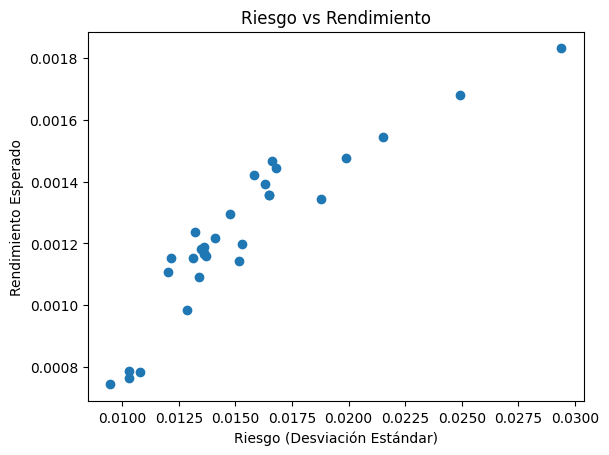

In [ ]:
plt.figure()
plt.scatter(results_df["Desv"], results_df["Mean"])
plt.xlabel("Riesgo (Desviación Estándar)")
plt.ylabel("Rendimiento Esperado")
plt.title("Riesgo vs Rendimiento")
plt.show()

###Histograma del portafolio óptimo

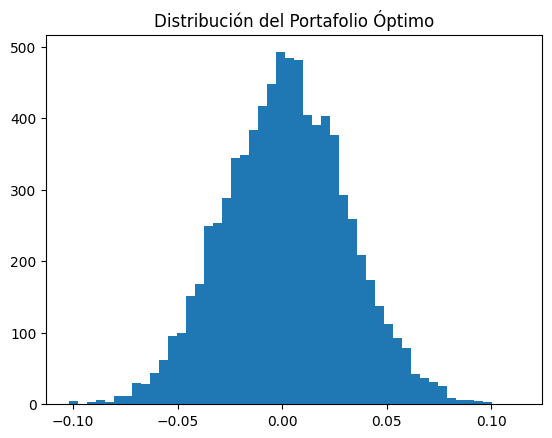

In [ ]:
opt_weights = opt_port["Weights"]
opt_returns = sim_returns @ opt_weights

plt.figure()
plt.hist(opt_returns, bins=50)
plt.title("Distribución del Portafolio Óptimo")
plt.show()

##*¿Cuántos portafolios cumplen la restricción?*

In [ ]:
len(portafolios_viables)

30

##*¿Cuánto rendimiento se sacrifica por controlar riesgo?*

In [ ]:
max_SIN_restriccion = results_df["Mean"].max()
max_CON_restriccion = portafolios_viables["Mean"].max()

sacrifice = max_SIN_restriccion - max_CON_restriccion
sacrifice

0.0

Se puede observar que de los 30 portafolios, los mismos 30 cumplen con la restricción, es por eso que el portafolio de mayor rendimiento YA satisface el nivel de riesgo permitido, de tal modo que NO se sacrifica rendimiento por controlar el riesgo.

# **Aplicación 2: Escenarios macroeconómicos Objetivo**

In [ ]:
N = 10000

escenarios = {
    "Base":    mu,
    "Alcista": mu + 0.001,
    "Bajista": mu - 0.001,
}


In [ ]:
# Simulamos 10,000 trayectorias por escenario usando pesos del portafolio óptimo
np.random.seed(0)
opt_w = opt_port["Weights"]

sim = {}
for nombre, medias in escenarios.items():
    rets = np.column_stack([np.random.normal(medias[i], sigma[i], N) for i in range(n_assets)])
    sim[nombre] = rets @ opt_w

In [ ]:
# Métricas por escenario
for nombre, rets in sim.items():
    print(f"--- {nombre} ---")
    print(f"  Rend. promedio  : {np.mean(rets):.5f}")
    print(f"  Desv. estándar  : {np.std(rets):.5f}")
    print(f"  Prob. pérdida   : {np.mean(rets < 0):.4f}")
    print(f"  VaR 95%         : {np.percentile(rets, 5):.5f}")
    print()



--- Base ---
  Rend. promedio  : 0.00202
  Desv. estándar  : 0.02983
  Prob. pérdida   : 0.4670
  VaR 95%         : -0.04729

--- Alcista ---
  Rend. promedio  : 0.00335
  Desv. estándar  : 0.02940
  Prob. pérdida   : 0.4544
  VaR 95%         : -0.04468

--- Bajista ---
  Rend. promedio  : 0.00135
  Desv. estándar  : 0.02941
  Prob. pérdida   : 0.4793
  VaR 95%         : -0.04783



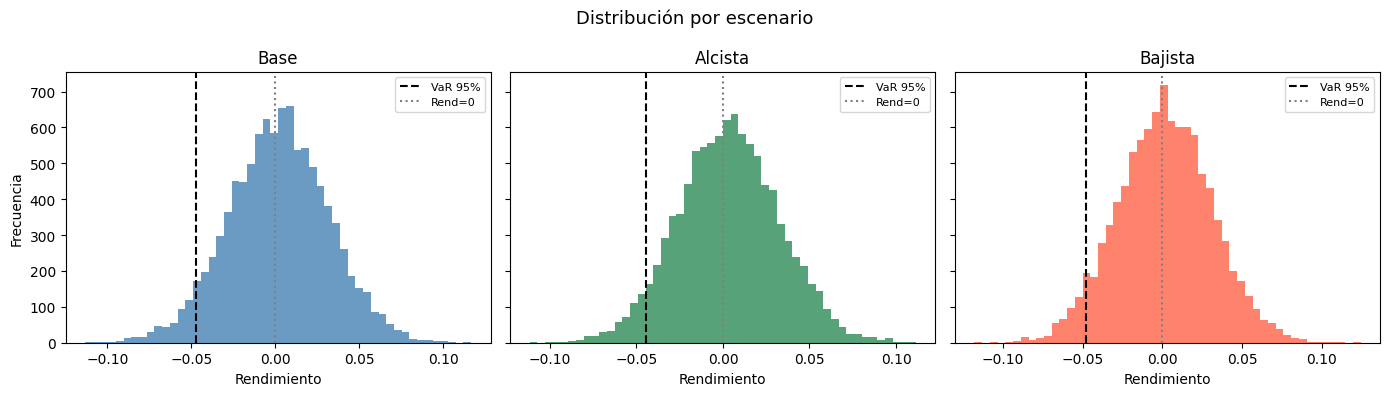

In [ ]:
# Histogramas comparativos
fig, axes = plt.subplots(1, 3, figsize=(14, 4), sharey=True)
colores = ["steelblue", "seagreen", "tomato"]

for ax, (nombre, rets), color in zip(axes, sim.items(), colores):
    ax.hist(rets, bins=50, color=color, alpha=0.8)
    ax.axvline(np.percentile(rets, 5), color="black", linestyle="--", label="VaR 95%")
    ax.axvline(0, color="gray", linestyle=":", label="Rend=0")
    ax.set_title(nombre)
    ax.set_xlabel("Rendimiento")
    ax.legend(fontsize=8)

axes[0].set_ylabel("Frecuencia")
plt.suptitle("Distribución por escenario", fontsize=13)
plt.tight_layout()
plt.show()


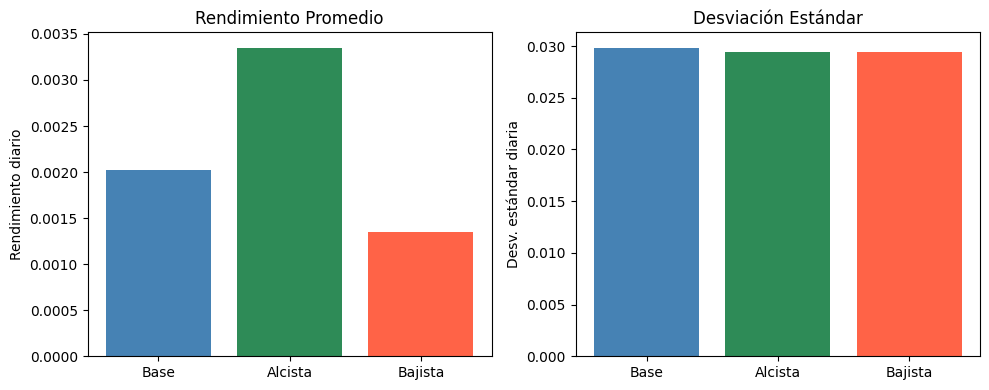

In [ ]:
# Gráfico comparativo de medias y desviaciones
nombres = list(sim.keys())
medias  = [np.mean(r) for r in sim.values()]
stds    = [np.std(r)  for r in sim.values()]
colores = ["steelblue", "seagreen", "tomato"]

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].bar(nombres, medias, color=colores)
axes[0].set_title("Rendimiento Promedio")
axes[0].set_ylabel("Rendimiento diario")

axes[1].bar(nombres, stds, color=colores)
axes[1].set_title("Desviación Estándar")
axes[1].set_ylabel("Desv. estándar diaria")

plt.tight_layout()
plt.show()


¿En qué escenario la probabilidad de pérdida es mayor?
- En el escenario bajista es mayor a cualquier otro escenario.

¿Cuál presenta mayor dispersión de resultados?
- Los 3 presentan la misma volatilidad, si se hubiese modificado los precios diarios y de ahí calcular la desviación estandar, sin duda hubiera sido diferente.

¿Cambian de manera relevante las métricas de riesgo extremo?
- Siento que aunque sean valores pequeños, si son demasiado las diferencias del bajista en rendimientos diarios en comparación con los bases o alcistas. Cuando se deben de percibir más es al convertir en anuales.